In [81]:
#===============================================================================
# carabao/screen library:
# - class Screen
#===============================================================================

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#============================================================================================================
# Canvas class
# usage: can = Canvas()
#        can.circle((x,y),r,color)     # plot circle
#        can.equal()                   # set equal aspect ratio
#============================================================================================================

class Canvas:
    def __init__(self,pos=None):
        pos = [0,0,1,1] if pos == None else pos
        self.userdata = None
        self.fig = None
        self.ax = None
        self.position = pos

        self.fig,self.ax = plt.subplots()
        self.frame()
        self.ax.axis('equal')

        xy = (2,2); r = 0.5; col = 'r'
        #self.circle(xy, r, col)
        #plt.show()

    def frame(self):                        # draw frame
        xl = self.position[0];  xh = self.position[2]
        yl = self.position[1];  yh = self.position[3]
        self.ax.plot([xl,xh,xh,xl,xl],[yl,yl,yh,yh,yl],color='k',linewidth=0.5)

    def circle(self,xy,r,col=None):
        hdl = plt.Circle(xy, r, facecolor=col,edgecolor='k',linewidth=0.5)  # circle patch object
        self.ax.add_patch(hdl)               # add circle to axis' patches
        return hdl

    def rect(self,xy1,xy2,col=None,angle=None):
        angle = 0 if angle == None else angle
        width = xy2[0]-xy1[0]; width = 2
        height = xy2[1]-xy1[1]; height = 5
        hdl = plt.Rectangle(xy1, width,height,
                            facecolor=col, edgecolor=col,angle=angle)
        self.ax.add_patch(hdl)               # add rectangle to axis' patches
        return hdl

    def fancy(self,xy1,xy2,col=None,r=None,angle=None):
        r = 0.1 if r == None else r
        angle = 30 if angle == None else angle
        lw = 0.5
        fcol = col
        ecol = 'k'
        style = "round, pad=%g" % r

        xy = (xy1[0]+r,xy1[1]+r)
        hdl = patches.FancyBboxPatch(xy, xy2[0]-xy1[0]-2*r,xy2[1]-xy1[1]-2*r,
                    facecolor=fcol, edgecolor=ecol, linewidth=lw,
                    boxstyle=style)

        trans = Affine2D().rotate_deg_around(10,10,angle)  + self.ax.transData        
        hdl.set_transform(trans)

        self.ax.add_patch(hdl)               # add rectangle to axis' patches
        return hdl

    def equal(self):
        self.ax.axes('equal')

#============================================================================================================
# class Screen
# usage: scr = Screen(m,n,s,d)         # create Screen instance
#        P = np.random.rand(s,d)       # permanences
#        Q = (P >= 0.5)                # synaptics
#        scr.plot((i,j),x,y,P,Q)
#============================================================================================================

class Screen:
    def __init__(self,tag,m=None,n=None,s=None,d=None):
        m = m if m != None else 4
        n = n if n != None else 10
        s = s if s != None else 5
        d = d if d != None else 2

        self.tag = tag
        self.m = m;  self.n = n;  self.s = s;  self.d = d
        self.ij = (0,0)
        self.setup()
        self.cls()

    def cls(self):           # clear screen
        self.can = Canvas([0,0,self.n+1,self.m+2])
        return self.can

    def setup(self):
        self.r0 = 0.45;  self.r1 = 0.38;  self.r2 = 0.31
        self.ds = 0.11; self.rs = self.ds/3;
        self.gray = (0.8,0.8,0.8);  self.red = (1,0,0)
        self.gold = (1,0.9,0);      self.dark = (0.5,0.5,0.5)
        self.blue = (0,0.5,1);      self.green=(0,0.8,0)
        self.magenta = (1,0.2,1)

    def cell(self,ij,x=None,y=None,P=None,Q=None,L=None):
        x = x if x else 0
        y = y if y else 0

        P = P if P != None else np.random.rand(self.d,self.s)
        Q = Q if Q != None else P*0    # permanence matrix
        L = L if L != None else P*0    # learning matrix

        outer = self.red if y>0 else self.gray
        inner = self.green if x>0 else self.dark
        core  = self.gold if L.any().any() else self.gray

        #print("y:",y,", outer:",outer)
        #print("x:",x,", inner:",inner)
        #print("P:\n",P)
        #print("Q:\n",Q)

        i = ij[0];  j = ij[1]
        x = 1+j; y = self.m+1-i;
        self.can.circle((x,y),self.r0,outer)
        self.can.circle((x,y),self.r1,inner)
        self.can.circle((x,y),self.r2,core)

        d0 = self.d-1;  s0 = self.s-1
        for mu in range(0,self.d):
            for nu in range(0,self.s):
                xx = x + self.ds*(nu-s0/2);
                yy = y + self.ds*(d0-mu-d0/2)
                if L[mu,nu] > 0 and P[mu,nu] < 0.5:
                    col = self.red
                elif L[mu,nu] > 0 and P[mu,nu] >= 0.5:
                    col = self.green
                elif Q[mu,nu] > 0:
                    col = self.magenta
                elif L[mu,nu] > 0 and P[mu,nu] < 0.5:
                    col = 'b'
                else:
                    col = 'w' if P[mu,nu] >= 0.5 else 'k'
                self.can.circle((xx,yy),self.rs,col)

    def input(self,j,u):
        u = u if u != None else 1
        x = 1+j; y = 1;
        col = self.blue if u > 0 else self.gray
        self.can.circle((x,y),self.r2,col)

    def at(self,i,j):  # to tell a Cell constructor where to place a cell
        self.ij = (i,j)
        return self

    def show(self):
        plt.show()


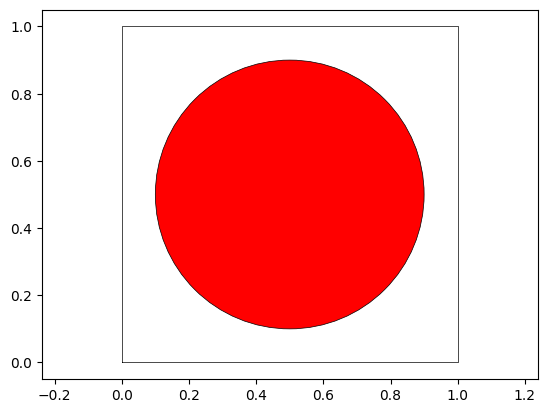

In [82]:
can = Canvas()
can.circle((.5,.5),0.4,'r')


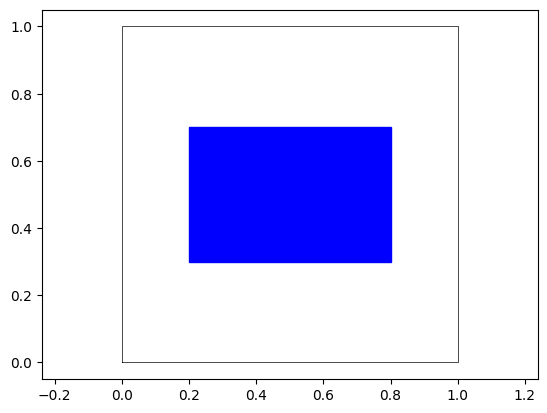

In [3]:
from carabao.screen import Canvas
can = Canvas()
can.rect((.2,.3),(0.8,0.7),'b')


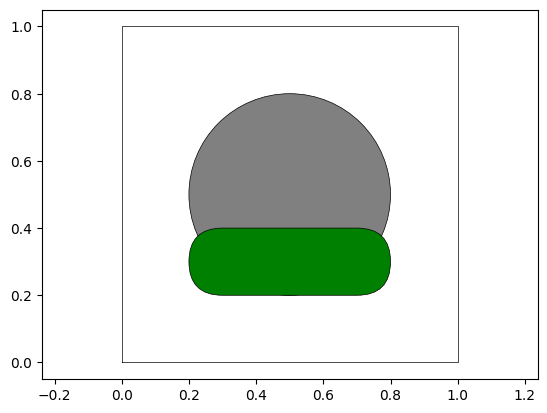

In [84]:
can = Canvas()
can.circle((.5,.5),0.3,(0.5,0.5,0.5))
can.fancy((0.2,0.2),(0.8,0.4),'g',r=0.1)


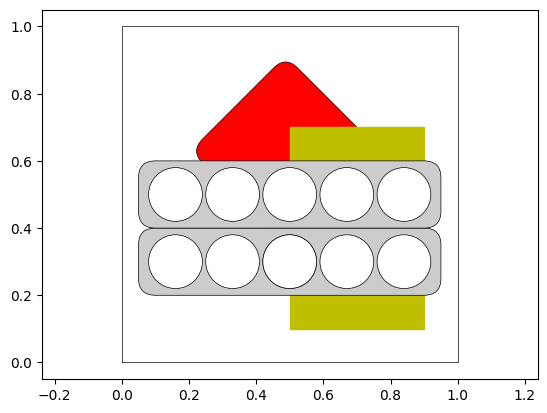

In [5]:
from carabao.screen import Canvas

gray = (.8,.8,.8)

can = Canvas()

hdl = can.fancy((0.3,0.6),(0.7,1.0),'r',r=0.05,angle=45,center=((.7,.7)))

can.rect((0.5,0.1),(0.9,0.7),'y')

can.fancy((0.05,0.2),(0.95,0.4),gray,r=0.05)
can.fancy((0.05,0.4),(0.95,0.6),gray,r=0.05)
can.circle((.5,.3),0.08,'w')
for i in range(-2,2+1):
    can.circle((.5+i*0.17,.3),0.08,'w')
    can.circle((.5+i*0.17,.5),0.08,'w')

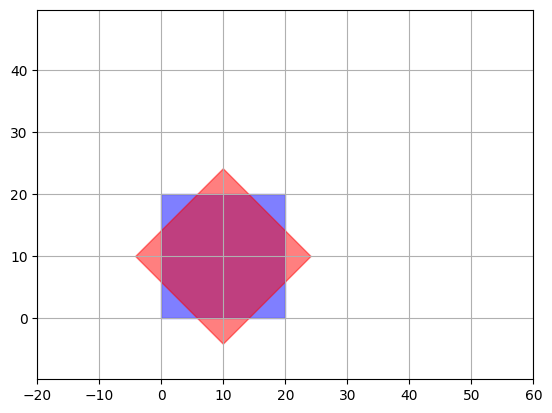

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.transforms import Affine2D

fig = plt.figure()
ax = fig.add_subplot(111)

r1 = patches.Rectangle((0,0), 20, 20, color="blue", alpha=0.50)
r2 = patches.Rectangle((0,0), 20, 20, color="red",  alpha=0.50)

#t2 = mpl.transforms.Affine2D().rotate_deg(-45) + ax.transData
#t2 = mpl.transforms.Affine2D().rotate_deg_around(10,10,-45)  + ax.transData
t2 = Affine2D().rotate_deg_around(10,10,-45)  + ax.transData
r2.set_transform(t2)

ax.add_patch(r1)
ax.add_patch(r2)
ax.axis('equal')

plt.xlim(-20, 60)
plt.ylim(-20, 60)

plt.grid(True)

plt.show()